In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split

In [2]:
folder = 'Kather_texture_2016_image_tiles_5000'
dfs = []
for tag in os.listdir(folder):
    files = os.listdir(os.path.join(folder,tag))
    dfs.append(pd.DataFrame(map(lambda x: [os.path.join(folder,tag,x),tag],files),columns=["path","category"]))
df = pd.concat(dfs)

In [3]:
df.sample(10)

,path,category
519,Kather_texture_2016_image_tiles_5000/02_STROMA...,02_STROMA
230,Kather_texture_2016_image_tiles_5000/04_LYMPHO...,04_LYMPHO
269,Kather_texture_2016_image_tiles_5000/02_STROMA...,02_STROMA
498,Kather_texture_2016_image_tiles_5000/04_LYMPHO...,04_LYMPHO
343,Kather_texture_2016_image_tiles_5000/07_ADIPOS...,07_ADIPOSE
301,Kather_texture_2016_image_tiles_5000/06_MUCOSA...,06_MUCOSA
203,Kather_texture_2016_image_tiles_5000/06_MUCOSA...,06_MUCOSA
414,Kather_texture_2016_image_tiles_5000/08_EMPTY/...,08_EMPTY
467,Kather_texture_2016_image_tiles_5000/03_COMPLE...,03_COMPLEX
533,Kather_texture_2016_image_tiles_5000/05_DEBRIS...,05_DEBRIS


In [4]:
train_df, val_df = train_test_split(df, test_size=0.1, stratify=df['category'])

[<AxesSubplot:>, <AxesSubplot:>]

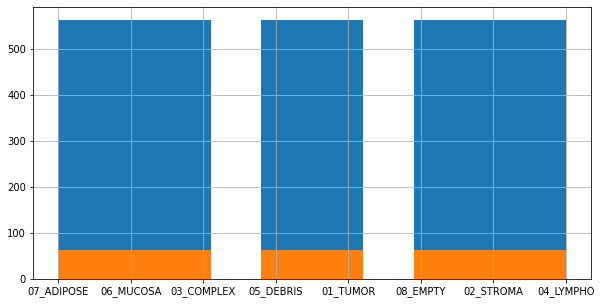

In [5]:
[train_df['category'].hist(),val_df['category'].hist(figsize=(10,5))]

In [6]:
df['train'] = df['path'].map(lambda x: x in train_df["path"].values)

In [7]:
df.to_csv("train.csv",index=False)